# Word Embeddings, Gated Recurrent Networks with LSTM, GRU & Dense Layers and Statistical Significances such as distances

In this, we use various ML methods, including gated recurrent networks from the Keras interface, 
on a well-known text processing example, that of a flipkart product reviews sentiment analysis. In this version we use the scrapped dataset from flipkart of product reviews to predict a positive or negative evaluation.

In [287]:
# Importing the libraries
import datetime
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import spacy
from textblob import TextBlob
import en_core_web_sm
import pyttsx3
from nltk import chunk
from nltk.tag import DefaultTagger
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras import models, layers, optimizers, datasets, utils, losses
from scipy.spatial import distance
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences
from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import regex as re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
import torch
import torchtext
import tensorflow as tf
import keras
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [289]:
df = pd.read_csv("product_reviews_labelled_dataset2.csv")

df = df[["Reviews","Sentiments"]]
df['Sentiments'] = df['Sentiments'].map({'positive':'1', 'negative':'0', 'neutral':'0'})


reviews = df['Reviews']
labels = df['Sentiments']

In [290]:
print(len(reviews))

818


In [291]:
print(len(labels))

818


In [292]:
reviews[3]

'First of all thank you Flipkart,Second one is Hisense.Now review for my 43’ led Tv. Some people say this product review wrong .But My opinion this one is awesome.Very fast connect .Picture quality is very nice 4K mode and HD both mode . Product is impressed for me and my family. Sound is very nice . All function are work very nicely  and also useful .All over experience is unbelievable. Once again Thankyou Flipkart and installation team.'

In [293]:
stop = set(stopwords.words('english'))

In [294]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    return doco_clean

In [295]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [296]:
print(sentences[7])

simply superb productpicture sound quality niceconnectivity awesomecast function android oreo versions easily connect version little bit tough voice activated blue tooth remote control work super google assistant reply responsible quicklyfinally opinion value money five years warranty panel good choice budget segment product good review last six days one month complete comments publish thank


In [297]:
print(reviews[7])

Simply superb productPicture and sound quality niceConnectivity is awesomeCast function above android Oreo versions easily connect, below version little bit tough.Voice activated blue tooth remote control work super and Google assistant reply responsible is quicklyFinally  my opinion is value for money and five years warranty ( panel only) is good choice for budget segment in this product  very good. My review is last six days. After one month  complete more comments will publish. Thank ...


In [298]:
reviews.shape

(818,)

In [299]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [300]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

In [301]:
print(text_sequences)

[list([38, 18]) list([52, 12, 2])
 list([202, 673, 1101, 1102, 432, 353, 388, 388, 289, 1, 5, 30, 576, 354, 20, 1103, 249, 1104, 20, 157, 12, 2, 55, 164, 146, 222, 62, 46, 14, 674, 8, 46, 14, 577, 98, 675, 827, 250, 1, 433, 165, 578, 12, 203, 1105, 158, 578])
 list([55, 85, 15, 498, 9, 249, 20, 204, 205, 79, 3, 20, 676, 290, 9, 13, 86, 147, 12, 2, 7, 203, 203, 3, 268, 434, 4, 7, 139, 72, 677, 8, 140, 51, 678, 579, 15, 26, 269])
 list([251, 20, 166, 40, 17, 56, 3, 15, 291, 27, 26, 292, 1106, 319, 249, 167, 320, 1107, 321, 188, 828, 252, 23, 148, 75, 580, 28, 89, 1108, 127, 176, 435, 85, 249, 15])
 list([3, 1109, 1110, 1111, 9, 46, 206, 9, 829, 177, 168, 1112, 679, 322, 9, 581, 323, 830, 223, 45, 1113, 499, 582, 680, 577, 164, 168, 831, 681, 355, 679, 1114, 1115, 235, 682, 683, 39, 178, 5, 30])
 list([324, 253, 105, 684, 15, 1116, 13, 149, 832, 685, 1117, 1118, 583, 1119, 833, 1120, 1121, 389, 249, 1122, 270, 436, 686, 356, 1123, 149, 1124, 436, 684, 1125, 1126, 834, 81, 584, 53, 687, 53

In [302]:
print(sequence_dict)

{'good': 1, 'quality': 2, 'product': 3, 'sound': 4, 'price': 5, 'bass': 6, 'nice': 7, 'also': 8, 'one': 9, 'best': 10, 'battery': 11, 'picture': 12, 'awesome': 13, 'great': 14, 'flipkart': 15, 'like': 16, 'use': 17, 'money': 18, 'buy': 19, 'review': 20, 'time': 21, 'connectivity': 22, 'using': 23, 'well': 24, 'really': 25, 'installation': 26, 'delivery': 27, 'better': 28, 'super': 29, 'range': 30, 'backup': 31, 'excellent': 32, 'boat': 33, 'amazing': 34, 'overall': 35, 'easy': 36, 'cleaner': 37, 'value': 38, 'worth': 39, 'days': 40, 'design': 41, 'much': 42, 'vacuum': 43, 'get': 44, 'bit': 45, 'looks': 46, 'even': 47, 'clear': 48, 'music': 49, 'day': 50, 'experience': 51, 'superb': 52, 'power': 53, 'suction': 54, 'first': 55, 'happy': 56, 'cleaning': 57, 'bluetooth': 58, 'used': 59, 'clean': 60, 'long': 61, 'video': 62, 'love': 63, 'works': 64, 'little': 65, 'voice': 66, 'budget': 67, 'low': 68, 'clarity': 69, 'pretty': 70, 'full': 71, 'work': 72, 'build': 73, 'perfect': 74, 'home': 75

In [303]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([ 3., 47., 54., 17., 26., 22., 22., 17., 10., 15., 17., 16., 23.,
        26., 13., 22., 34., 22., 13., 13., 12., 16., 17., 29.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

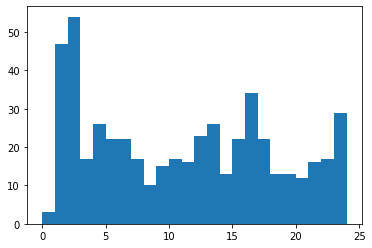

In [304]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [305]:
print(reviews_encoded[135])

[190, 752, 10, 272, 12, 4, 2, 34, 625, 231, 920, 227, 446, 394, 173, 109, 200, 626, 46, 1, 127, 1293, 12, 331, 44, 1, 12, 2, 753, 146, 152, 625, 8, 177, 200, 114, 921, 96, 1294, 922, 204, 1295, 1296, 136, 753, 146]


In [306]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [307]:
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [308]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [309]:
X = X[random_posits];
Y = Y[random_posits];

In [310]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [311]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [312]:
x_train = X_train
y_train = Y_train
x_test = X_dev
y_test = Y_dev

Epoch 1/100
44/44 [==============================] - 1s 13ms/step - loss: 0.4553 - accuracy: 0.9065 - val_loss: 0.3668 - val_accuracy: 0.8769
Epoch 2/100
44/44 [==============================] - 0s 8ms/step - loss: 0.3024 - accuracy: 0.9165 - val_loss: 0.3664 - val_accuracy: 0.8769
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2858 - accuracy: 0.9165 - val_loss: 0.3745 - val_accuracy: 0.8769
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2757 - accuracy: 0.9165 - val_loss: 0.3607 - val_accuracy: 0.8769
Epoch 5/100
44/44 [==============================] - 0s 7ms/step - loss: 0.2642 - accuracy: 0.9165 - val_loss: 0.3520 - val_accuracy: 0.8769
Epoch 6/100
44/44 [==============================] - 0s 7ms/step - loss: 0.2371 - accuracy: 0.9180 - val_loss: 0.3344 - val_accuracy: 0.8769
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2167 - accuracy: 0.9194 - val_loss: 0.3084 - val_accuracy: 0.8923
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9885 - val_loss: 0.6457 - val_accuracy: 0.9077
Epoch 60/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9856 - val_loss: 0.5924 - val_accuracy: 0.9077
Epoch 61/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0288 - accuracy: 0.9871 - val_loss: 0.4858 - val_accuracy: 0.8923
Epoch 62/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9914 - val_loss: 0.5391 - val_accuracy: 0.9077
Epoch 63/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.9914 - val_loss: 0.5644 - val_accuracy: 0.8923
Epoch 64/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9899 - val_loss: 0.6758 - val_accuracy: 0.9077
Epoch 65/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.5589 - val_accuracy: 0.9077
Epoch 

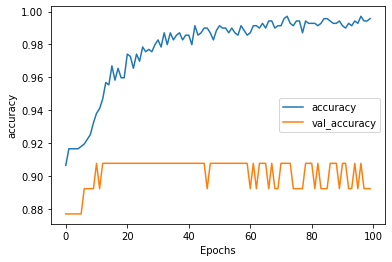

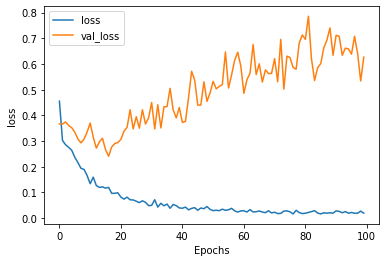

In [313]:
# Program that uses and embedding layer and an LSTM to learn some sentiment analysis from product reviews.
batch_size = 16
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
h=layers.LSTM(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_LSTM = models.Model(inputs, outputs)

model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_LSTM = model_LSTM.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

score, acc = model_LSTM.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_LSTM, "accuracy")
plot_graphs(history_LSTM, "loss")

Epoch 1/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4692 - accuracy: 0.8950 - val_loss: 0.3476 - val_accuracy: 0.8769
Epoch 2/100
44/44 [==============================] - 1s 14ms/step - loss: 0.2683 - accuracy: 0.9165 - val_loss: 0.3431 - val_accuracy: 0.8769
Epoch 3/100
44/44 [==============================] - 1s 13ms/step - loss: 0.2425 - accuracy: 0.9165 - val_loss: 0.3004 - val_accuracy: 0.8923
Epoch 4/100
44/44 [==============================] - 1s 12ms/step - loss: 0.2031 - accuracy: 0.9165 - val_loss: 0.2854 - val_accuracy: 0.8923
Epoch 5/100
44/44 [==============================] - 1s 12ms/step - loss: 0.1580 - accuracy: 0.9237 - val_loss: 0.2373 - val_accuracy: 0.8923
Epoch 6/100
44/44 [==============================] - 1s 11ms/step - loss: 0.1294 - accuracy: 0.9482 - val_loss: 0.2365 - val_accuracy: 0.9077
Epoch 7/100
44/44 [==============================] - 0s 11ms/step - loss: 0.1039 - accuracy: 0.9583 - val_loss: 0.2485 - val_accuracy: 0.9077
Epoch 

44/44 [==============================] - 1s 13ms/step - loss: 0.0145 - accuracy: 0.9942 - val_loss: 0.3780 - val_accuracy: 0.9385
Epoch 59/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 0.3762 - val_accuracy: 0.9385
Epoch 60/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.3946 - val_accuracy: 0.9231
Epoch 61/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.3924 - val_accuracy: 0.9231
Epoch 62/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.3939 - val_accuracy: 0.9231
Epoch 63/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.3928 - val_accuracy: 0.9385
Epoch 64/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.4110 - val_accuracy: 0.9231
Epoch 65/100

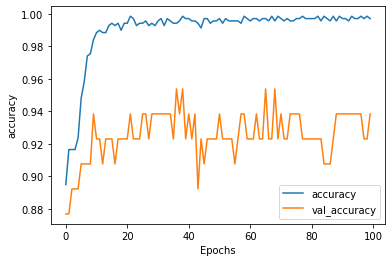

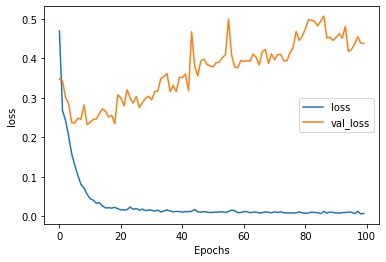

In [314]:
# Training an LSTM with including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
#e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
e=layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e) 
h=layers.LSTM(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_LSTM_T = models.Model(inputs, outputs= outputs)

model_LSTM_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_LSTM_T = model_LSTM_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

score, acc = model_LSTM_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_LSTM_T, "accuracy")
plot_graphs(history_LSTM_T, "loss")

Epoch 1/100
44/44 [==============================] - 1s 12ms/step - loss: 0.4381 - accuracy: 0.9094 - val_loss: 0.3699 - val_accuracy: 0.8769
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.9165 - val_loss: 0.3656 - val_accuracy: 0.8769
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.9165 - val_loss: 0.3571 - val_accuracy: 0.8769
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.9165 - val_loss: 0.3507 - val_accuracy: 0.8769
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.9165 - val_loss: 0.3748 - val_accuracy: 0.8769
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.9151 - val_loss: 0.3181 - val_accuracy: 0.8769
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.9165 - val_loss: 0.2946 - val_accuracy: 0.8923
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 0.4235 - val_accuracy: 0.8923
Epoch 60/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9899 - val_loss: 0.4953 - val_accuracy: 0.9077
Epoch 61/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9871 - val_loss: 0.5208 - val_accuracy: 0.9077
Epoch 62/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 0.9856 - val_loss: 0.4362 - val_accuracy: 0.8923
Epoch 63/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9799 - val_loss: 0.3997 - val_accuracy: 0.9077
Epoch 64/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9871 - val_loss: 0.4111 - val_accuracy: 0.8923
Epoch 65/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9827 - val_loss: 0.4165 - val_accuracy: 0.8923
Epoch 

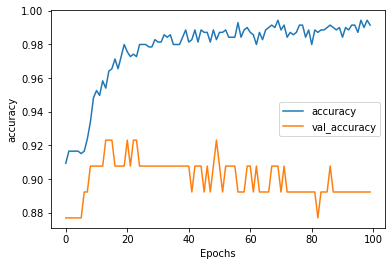

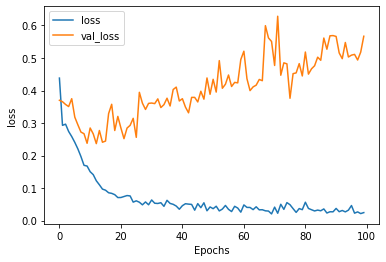

In [315]:
# Program that uses and embedding layer and an GRU to learn some sentiment analysis from product reviews.
batch_size = 16
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
h=layers.GRU(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_GRU = models.Model(inputs, outputs)

model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_GRU = model_GRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

score, acc = model_GRU.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_GRU, "accuracy")
plot_graphs(history_GRU, "loss")

Epoch 1/100
44/44 [==============================] - 1s 19ms/step - loss: 0.4388 - accuracy: 0.8950 - val_loss: 0.3465 - val_accuracy: 0.8769
Epoch 2/100
44/44 [==============================] - 1s 14ms/step - loss: 0.2562 - accuracy: 0.9165 - val_loss: 0.3424 - val_accuracy: 0.8769
Epoch 3/100
44/44 [==============================] - 1s 15ms/step - loss: 0.2337 - accuracy: 0.9165 - val_loss: 0.2852 - val_accuracy: 0.8769
Epoch 4/100
44/44 [==============================] - 1s 14ms/step - loss: 0.1962 - accuracy: 0.9180 - val_loss: 0.2519 - val_accuracy: 0.8923
Epoch 5/100
44/44 [==============================] - 1s 12ms/step - loss: 0.1584 - accuracy: 0.9252 - val_loss: 0.2316 - val_accuracy: 0.9077
Epoch 6/100
44/44 [==============================] - 1s 12ms/step - loss: 0.1090 - accuracy: 0.9583 - val_loss: 0.2013 - val_accuracy: 0.9077
Epoch 7/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0876 - accuracy: 0.9698 - val_loss: 0.1939 - val_accuracy: 0.9231
Epoch 

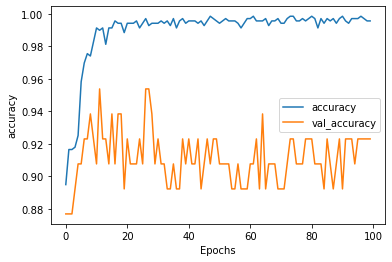

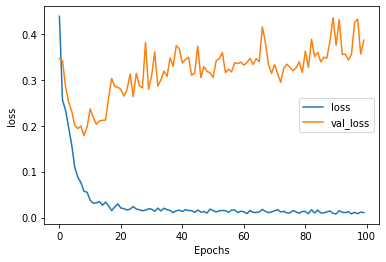

In [316]:
# Training an GRU with including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e) 
h=layers.GRU(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_GRU_T = models.Model(inputs, outputs= outputs)

model_GRU_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_GRU_T = model_GRU_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

score, acc = model_GRU_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_GRU_T, "accuracy")
plot_graphs(history_GRU_T, "loss")

Epoch 1/100
44/44 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.8806 - val_loss: 0.2746 - val_accuracy: 0.8769
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.9165 - val_loss: 0.2369 - val_accuracy: 0.8923
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1135 - accuracy: 0.9540 - val_loss: 0.2313 - val_accuracy: 0.9077
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9827 - val_loss: 0.2474 - val_accuracy: 0.8923
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.2764 - val_accuracy: 0.8923
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9942 - val_loss: 0.2901 - val_accuracy: 0.8923
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.3114 - val_accuracy: 0.8923
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.6810 - val_accuracy: 0.8308
Epoch 60/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.6902 - val_accuracy: 0.8154
Epoch 61/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.6949 - val_accuracy: 0.8154
Epoch 62/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.6855 - val_accuracy: 0.8308
Epoch 63/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.7018 - val_accuracy: 0.8154
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.7220 - val_accuracy: 0.8154
Epoch 65/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.7128 - val_accuracy: 0.8308
Epoch 

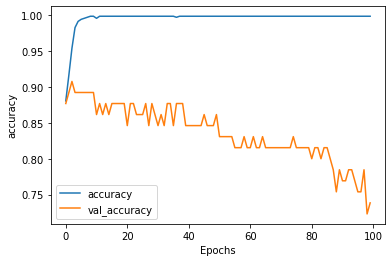

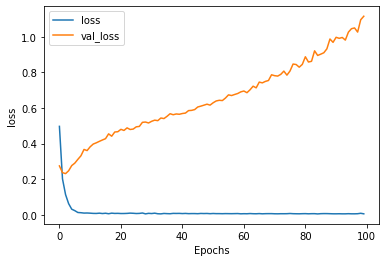

In [317]:
# Training with Dense Layer including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
e =layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e)
h=layers.Dense(128, activation = "relu" )(emb)
outputs=layers.Dense(2, activation='sigmoid',)(h)
model_Dense_T = models.Model(inputs, outputs)

model_Dense_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_Dense = model_Dense_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

score, acc = model_Dense_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_Dense, "accuracy")
plot_graphs(history_Dense, "loss")

# Calculating pairwise distance of words from the vocabulary in embedding space.

In [318]:
weights = model_LSTM_T.get_weights()[0]
#print(weights)

# Taking the embeddings from all words
x = weights[sequence_dict['easy']-1]
y = weights[sequence_dict['hard']-1]
z = weights[sequence_dict['happy']-1]
a = weights[sequence_dict['sadly']-1]

# Printing distances between words
print("Distance between {good} and {bad} in LSTM is : "+str(distance.euclidean(x, y)))
print("Distance between {bad} and {happy} in LSTM is : "+str(distance.euclidean(y, z)))
print("Distance between {happy} and {sadly} in LSTM is : "+str(distance.euclidean(z, a)))
print("Distance between {sadly} and {good} in LSTM is : "+str(distance.euclidean(x, a)))

Distance between {good} and {bad} in LSTM is : 0.5931226015090942
Distance between {bad} and {happy} in LSTM is : 0.6373116374015808
Distance between {happy} and {sadly} in LSTM is : 0.6525475978851318
Distance between {sadly} and {good} in LSTM is : 0.5410187244415283


# GloVe: Global Vectors for Word Representation

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [319]:
# Using Global Vectors for Word Representation for calculating the word distances in the embedding space
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 100

In [320]:
glove['hard']

tensor([-0.5308, -0.2197,  0.5327, -0.2314,  0.0743, -0.0655, -0.1042,  0.3072,
        -0.4964,  0.6537, -0.3848, -0.1626, -0.6452,  0.3677,  0.0895,  0.3313,
         0.7255, -0.0513,  0.3686, -0.8990, -0.5323,  0.3354,  0.1941,  0.1839,
         0.5277, -1.8321, -0.5357,  0.1196,  0.8731, -0.4091,  3.5748,  0.1680,
        -0.2698,  0.1895, -0.1553,  0.2306, -0.3075,  0.4440,  0.1433, -0.5658,
        -0.1302,  0.2943, -0.0526,  0.4033,  0.4579,  0.3516, -0.0197, -0.2006,
        -0.2473, -0.0306])

In [321]:
glove['happy']

tensor([ 0.0921,  0.2571, -0.5869, -0.3703,  1.0828, -0.5547, -0.7814,  0.5870,
        -0.5871,  0.4632, -0.1127,  0.2606, -0.2693, -0.0725,  1.2470,  0.3057,
         0.5673,  0.3051, -0.0503, -0.6444, -0.5451,  0.8643,  0.2091,  0.5633,
         1.1228, -1.0516, -0.7811,  0.2966,  0.7261, -0.6139,  2.4225,  1.0142,
        -0.1775,  0.4147, -0.1297, -0.4706,  0.3807,  0.1631, -0.3230, -0.7790,
        -0.4247, -0.3083, -0.4224,  0.0551,  0.3827,  0.0374, -0.4302, -0.3944,
         0.1051,  0.8729])

In [322]:
x = glove['easy']
y = glove['hard']
z = glove['happy']
a = glove['sadly']

# Printing distances between words
print("Distance between {good} and {bad} in LSTM is : "+str((torch.norm(y - x))))
print("Distance between {bad} and {happy} in LSTM is : "+str((torch.norm(z - y))))
print("Distance between {happy} and {sadly} in LSTM is : "+str((torch.norm(a - z))))
print("Distance between {sadly} and {good} in LSTM is : "+str((torch.norm(x - a))))

Distance between {good} and {bad} in LSTM is : tensor(2.5453)
Distance between {bad} and {happy} in LSTM is : tensor(3.5998)
Distance between {happy} and {sadly} in LSTM is : tensor(3.4765)
Distance between {sadly} and {good} in LSTM is : tensor(4.4945)


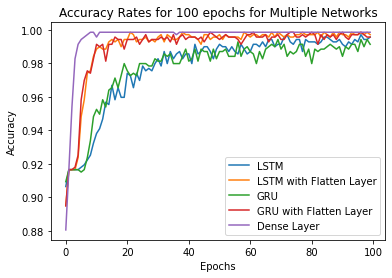

In [329]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM_T.history['accuracy'])
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU_T.history['accuracy'])
plt.plot(history_Dense.history['accuracy'])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Accuracy Rates for 100 epochs for Multiple Networks")
plt.show()

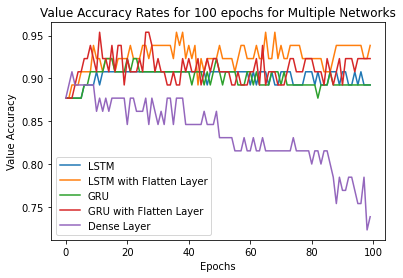

In [330]:
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history_LSTM_T.history['val_accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.plot(history_GRU_T.history['val_accuracy'])
plt.plot(history_Dense.history['val_accuracy'])

plt.xlabel("Epochs")
plt.ylabel("Value Accuracy")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Value Accuracy Rates for 100 epochs for Multiple Networks")
plt.show()

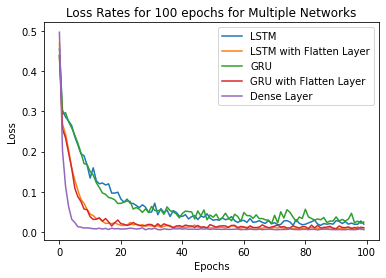

In [331]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM_T.history['loss'])
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU_T.history['loss'])
plt.plot(history_Dense.history['loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Loss Rates for 100 epochs for Multiple Networks")
plt.show()

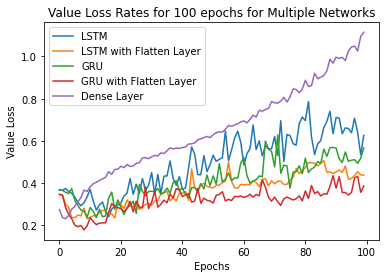

In [333]:
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history_LSTM_T.history['val_loss'])
plt.plot(history_GRU.history['val_loss'])
plt.plot(history_GRU_T.history['val_loss'])
plt.plot(history_Dense.history['val_loss'])

plt.xlabel("Epochs")
plt.ylabel("Value Loss")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Value Loss Rates for 100 epochs for Multiple Networks")
plt.show()